# Notizen

In [1]:
#split Data into train and test Data -> with k-fold cross-validation

In [2]:
#heavyside activision function macht nur 0 oder 1 und sonst keine Unterscheidung / oder linear
#oder logistic oder tangens hyperbolicus (tanh) oder rectifier
#Hidden-LAyer ReLU oder Sigmoid, Output-Layer Softmax?
# Für Classifiction Problems -> output-layer softmax ist typisch als Aktivierungsfunktion (summe aller Nodes = 1)

In [3]:
#Entweder ein Perceptron in der Output-Schicht oder aber maximal zwei!

In [4]:
#Ein Durchlauf aller Traings-Daten wird eine Epoche genannt -> Man braucht viele Epochen

In [5]:
#Aber braucht sehr lange das Epochen lernen, deswegen Mini-batch updating wird benutzt

In [6]:
# Nach Test-Phaes -> Confusion-Matrix darstellen
# Eventuell auch Loss mit mean sum of squared errors
# learning rate?
#loss and accuracy curve?
#roc-curve?

In [7]:
#Die Backpropagtion sollte nach einer bestimmten ZEit gestoppt werden, damit sich das System nicht zum Beispiel in einem lokalen Minimum verrent.

In [8]:
#Was ist mit One-hot encoding? also anstatt 1,2,3 dann 1,0,1 .. etc.

In [9]:
# Overfitting vermeiden mit train-validation-test split -> stop training when overfitting starts! (early-stopping) -> early-stopping immer anwenden!
# vermeiden mit Ensemble (mehrere Modls) bei ausreichend Daten und viel Rechenpower/Zeit -> wahrsch. wird dann bestes Model gewählt
# oder durch Dropout bei neuronalen NEtzen mit vielen Schichten
# Kombination möglich
# mit ReLu

In [10]:
# Mit Confusion Matrix folgendes darstellen: overall accurancy, true positive rate / true negative rate / precision, (recall), (f1)

In [11]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report

In [12]:
#train_data, test_data, train_lables, test_labels = train_test_split(data, labels, test_size = 0.4)

In [13]:
#model = Perceptron()

#input layer is created implictly, based on input_dim
#model.add ( Dense(units=20, activation='tanh', input_dim=n_attributes)) #hidden layer
#model.add ( Dense (units=10, activation='tanh') ) #hidden layer
#model.add ( Dense (units=n_classes, activation='softmax')) #output layer

#model.fit(train_data, train_labels)
#predictions = model.predict(test_data)
#con_matrix = confusion_matrix(test_labels, predictions)
#print(con_matrix)
#class_report = classification_report(test_labels, predictions)
#print(class_report)

In [14]:
# FÜR CNNs

# Daten Input
#-> Images
#Pro-processing
#-> Scaling, Noise reduction, changing color etc.
#Selecting areas of interest
#-> zum Beispiel Classification, Object detection etc.
#Feature extracting
#-> Extracting data about features
#Prediction / Recognition

#CNN: convolution (-> ReLU) -> Pooling -> fully-connected

#ein CNN hat zwischen 3 und 150 Schichten (oder mehr) deswegen Deep Learning

#Ein Bild RGB hat zum Beispiel 5x5x3 Dimensionen zum Beispiel bei einem 4 x 4 Pixel bild mit R G B
#Dann fährt ein Kernel darüber und macht daraus ein 3x3x3 Convolved Feature

#Ein Kernel ist ein Filter, mit welchem die eine neue Zahl berechnet wird. Er verkleinert also auch das Bild
# Aber Pooling macht dann z.B. aus 3x3 ein 1. Also größerer Verkleinerung 

# Je kleiner der KErnel (VERMUTUNG) desto mehr details werden erkannt ?

#Bei Farben R G B fährt der Kernel über jede Schicht und verrechnet die Werte dann werden diese von allen drei ergebnissen aufsummiert und plus einen Bias gerechnet. Dann wird dieser Wert weiter benutzt.

#Stride bedeutet, dass der Kernel ebim convolution-Vorgang nicht immer noch 1 Feld (Standard stride) sondern auch gleich zwei felder weitergehen kann stride = 2

# was beim Convolutional rauskommt ist eine feature map und diese wird ohne Padding kleiner ausfallen nach oben und rechts (würfelartig, rechteckig gesehn) als der ursprünglich input
#-> deswegen padding benutzen! GANZ WICHTIG! durch Padding werden am Bildrand 0en hinzugefügt. Dadurch behält die 
# feature map nach dem convolution die selbe größe, wie der original input. Schrumpfen dann durch Pooling!

#Pooling shortens the training time and combats overfitting

In [15]:
# von nternetseite aus Skript


#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
#                 input_shape=(150, 150, 3)))
#model.add(MaxPooling2D((2, 2), name='maxpool_1'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
#model.add(MaxPooling2D((2, 2), name='maxpool_2'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
#model.add(MaxPooling2D((2, 2), name='maxpool_3'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
#model.add(MaxPooling2D((2, 2), name='maxpool_4'))
#model.add(Flatten())
#model.add(Dropout(0.5))
#model.add(Dense(512, activation='relu', name='dense_1'))
#model.add(Dense(128, activation='relu', name='dense_2'))
#model.add(Dense(1, activation='sigmoid', name='output'))

# Bilder wurden bereits im Vorfeld auf 256x256 skaliert

# Importe

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Daten laden (Einhörner und Pferde)

In [17]:
data_path_einhoerner_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner"
data_path_einhoerner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner/Einhorn"
data_path_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner/Pferd"

# Bilder zählen

In [18]:
import os

anzahl_einhoerner = len(os.listdir(data_path_einhoerner))
anzahl_pferde = len(os.listdir(data_path_pferde))

print(f"Anzahl der Einhorn-Bilder: {anzahl_einhoerner}")
print(f"Anzahl der Pferde-Bilder: {anzahl_pferde}")

Anzahl der Einhorn-Bilder: 4001
Anzahl der Pferde-Bilder: 4000


# Bilder zum Test öffnen

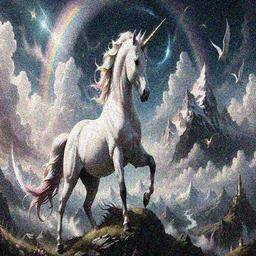

In [19]:
bsp_einhorn_1_dateiname = os.listdir(data_path_einhoerner)[0]
kompletter_pfad_einhorn_1 = os.path.join(data_path_einhoerner, bsp_einhorn_1_dateiname)

bsp_pferd_1_dateiname = os.listdir(data_path_pferde)[0]
kompletter_pfad_pferd_1 = os.path.join(data_path_pferde, bsp_pferd_1_dateiname)

PIL.Image.open(kompletter_pfad_einhorn_1)



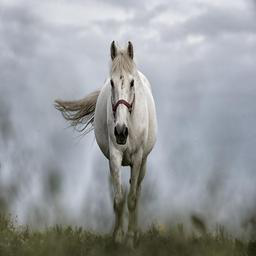

In [20]:
PIL.Image.open(kompletter_pfad_pferd_1)

# Dataset mit Keras erstellen

In [21]:
batch_size = 32
img_height = 256
img_width = 256

In [22]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [23]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [24]:
class_names = train_dataset.class_names
print(class_names)

['Einhorn', 'Pferd']


# Bilder anzeigen

2025-02-03 12:58:37.133677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


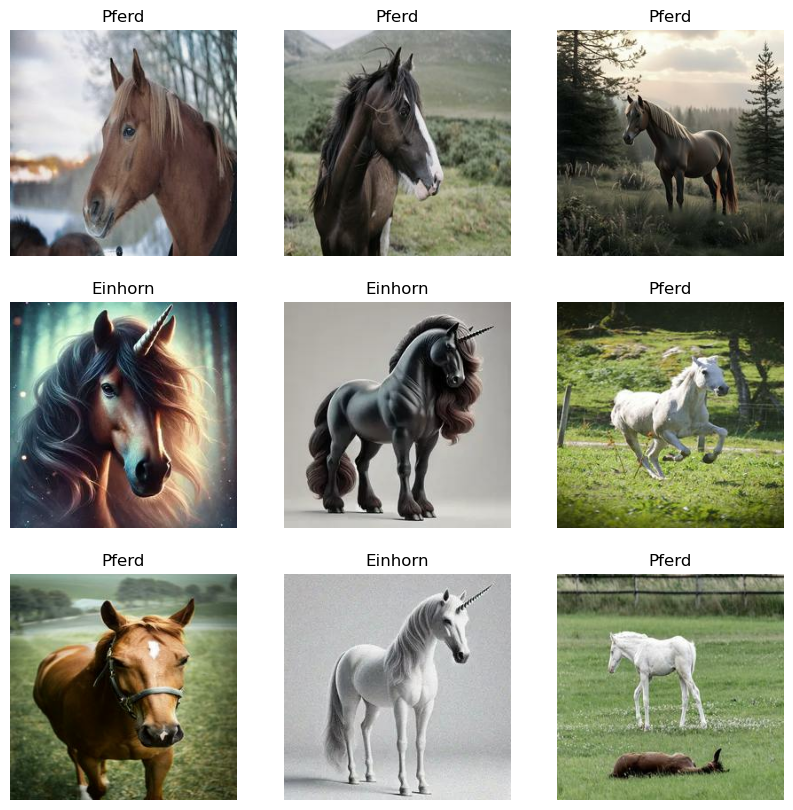

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Batch shape information

In [27]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# Performance steigern

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data
### from [0, 255] auf [0,1]

In [31]:
normalization_layer = layers.Rescaling(1./255)

# Create basic model

In [32]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/Users/peter/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# compile model

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model 
### with early stopping

In [35]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 254ms/step - accuracy: 0.7328 - loss: 0.7060 - val_accuracy: 0.9325 - val_loss: 0.1735
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 261ms/step - accuracy: 0.9307 - loss: 0.1756 - val_accuracy: 0.9731 - val_loss: 0.0720
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 268ms/step - accuracy: 0.9730 - loss: 0.0771 - val_accuracy: 0.9581 - val_loss: 0.0931
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.9850 - loss: 0.0423 - val_accuracy: 0.9850 - val_loss: 0.0402
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 259ms/step - accuracy: 0.9977 - loss: 0.0097 - val_accuracy: 0.9956 - val_loss: 0.0152
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 265ms/step - accuracy: 0.9975 - loss: 0.0102 - val_accuracy: 0.9862 - val_loss: 0.0386
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9866 - loss: 0.0358 - val_accuracy: 0.9819 - val_loss: 0.0472
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9983 - loss: 0

# Visualize training results

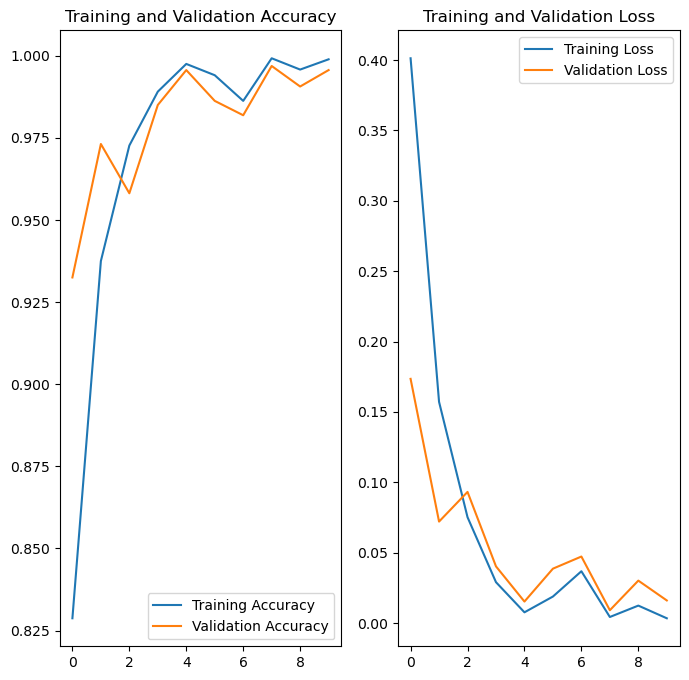

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Overfitting


## Overfitting: Data Augmentation
#### Bereits erledigt (Bilder gespiegelt, Bilder Kontrast geändert, Bilder mit Rauschen versetzt ==> von 500 Bilder pro Klasse auf 4000 Bilder pro Klasse gekommen)

## Overfitting: Dropout

In [41]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# Compile and train angepasstes model

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 267ms/step - accuracy: 0.7278 - loss: 0.7219 - val_accuracy: 0.9325 - val_loss: 0.1701
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.9380 - loss: 0.1588 - val_accuracy: 0.9719 - val_loss: 0.0891
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 265ms/step - accuracy: 0.9783 - loss: 0.0661 - val_accuracy: 0.9794 - val_loss: 0.0691
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9588 - val_loss: 0.1259
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.9884 - loss: 0.0299 - val_accuracy: 0.9944 - val_loss: 0.0177
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 247ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9956 - val_loss: 0.0200
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - accuracy: 0.9929 - loss: 0.0193 - val_accuracy: 0.9950 - val_loss: 0.0139
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.9993 - loss: 0

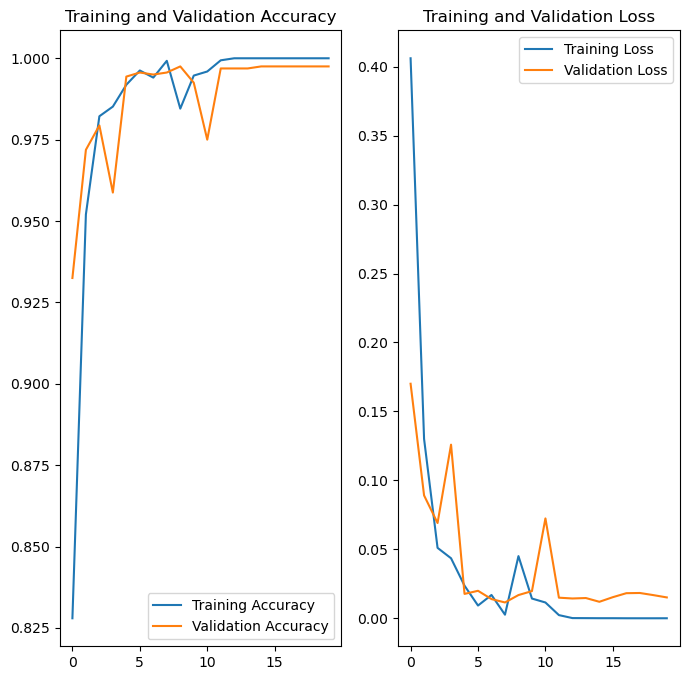

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict new data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This image most likely belongs to Einhorn with a 100.00 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


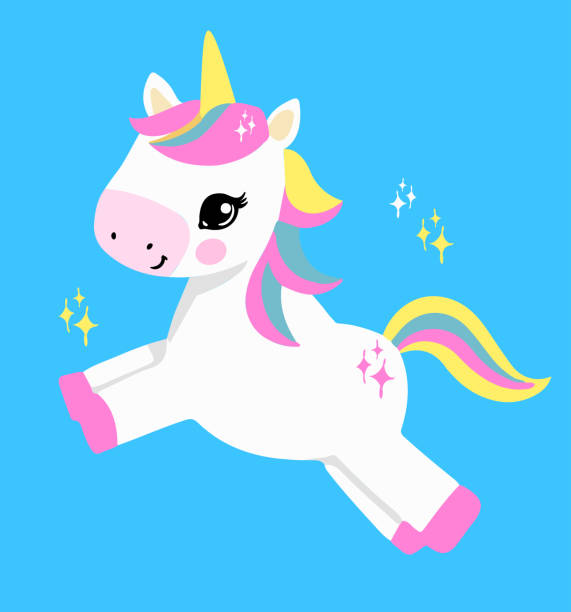

In [50]:

# Lokaler Pfad zum Bild
einhorn_ordner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
einhorn_path = os.path.join(einhorn_ordner, "istockphoto-2193425918-612x612.jpg")  # Korrekte Verbindung

# Bild laden & vorbereiten
img = tf.keras.utils.load_img(einhorn_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(einhorn_path)

# ACHTUNG: Anscheinend erkennt das CNN keine Pferde, wenn diese NCIHT photorealistisch vorliegen
### -> Pferde-Bilder noch in cartoon-ähnliche Varianten und schwarz-weiß-Varianten erzeugen
### -> Auch bei Einhorn Bildern machen
### -> Dann Model neutrainieren

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This image most likely belongs to Einhorn with a 99.97 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


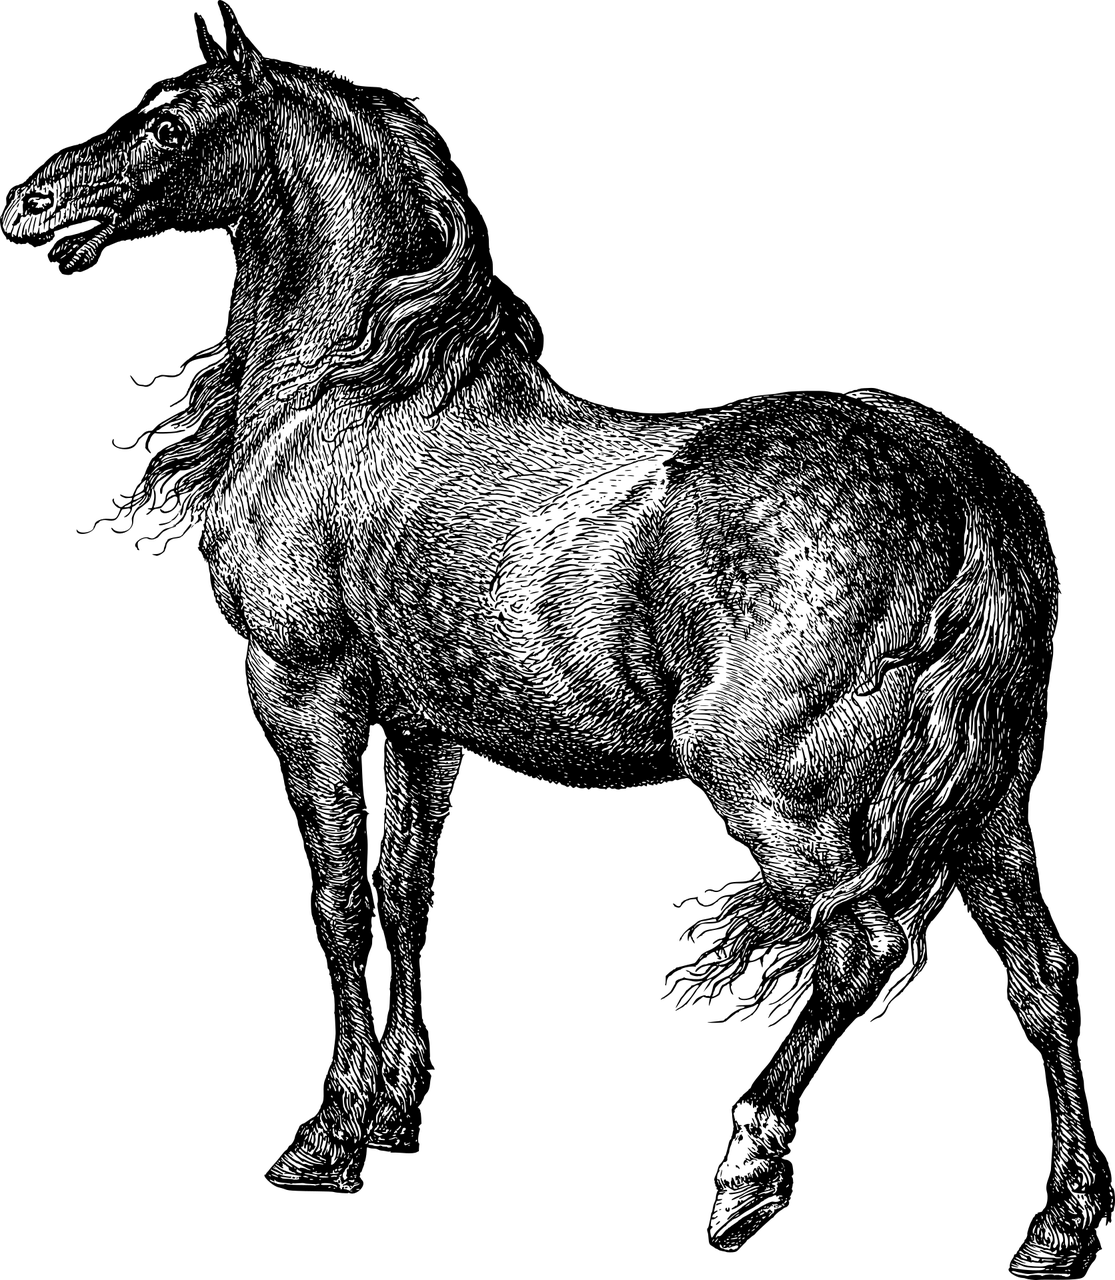

In [53]:

# Lokaler Pfad zum Bild
pferd = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
pferd_path = os.path.join(pferd, "horse-5553124_1280.jpg")  # Korrekte Verbindung

# Bild laden & vorbereiten
img = tf.keras.utils.load_img(pferd_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(pferd_path)

### Beweis: realistisches Pferd wird ohne Probleme erkannt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This image most likely belongs to Pferd with a 100.00 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


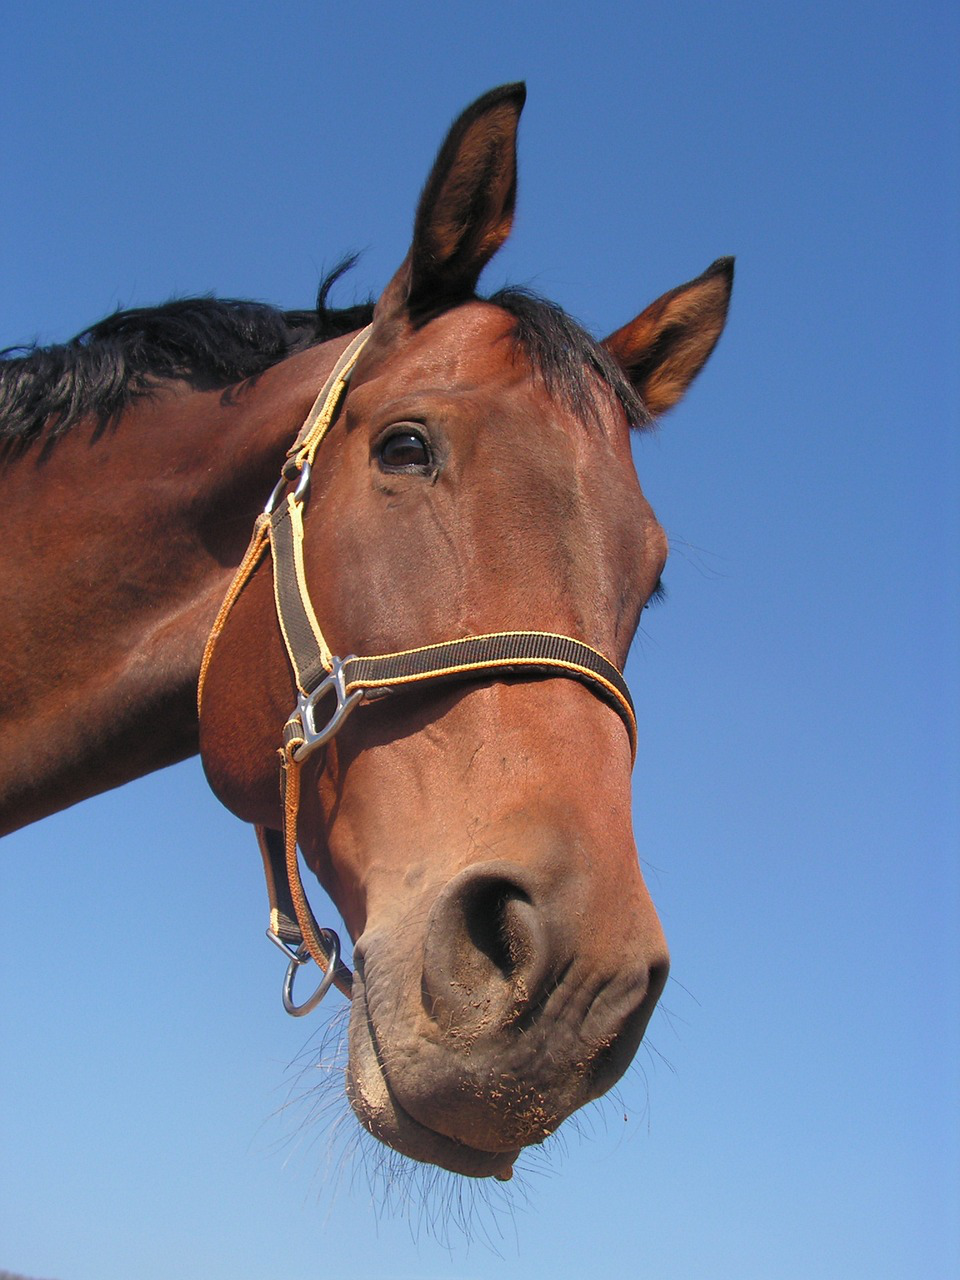

In [54]:

# Lokaler Pfad zum Bild
pferd = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
pferd_path = os.path.join(pferd, "horse-473093_1280.jpg")  # Korrekte Verbindung



# Bild laden & vorbereiten
img = tf.keras.utils.load_img(pferd_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(pferd_path)

# Neues Modell erstellen
### mit Graustufen Bildern und Cartoon Bildern
##### für eine noch bessere Unterscheidung

In [55]:
data_path_einhoerner_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/6000_pferde_6000_einhoerner"
data_path_einhoerner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/6000_pferde_6000_einhoerner/Einhorn"
data_path_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/6000_pferde_6000_einhoerner/Pferd"

In [56]:
anzahl_einhoerner = len(os.listdir(data_path_einhoerner))
anzahl_pferde = len(os.listdir(data_path_pferde))

print(f"Anzahl der Einhorn-Bilder: {anzahl_einhoerner}")
print(f"Anzahl der Pferde-Bilder: {anzahl_pferde}")

Anzahl der Einhorn-Bilder: 6001
Anzahl der Pferde-Bilder: 6000


In [57]:
batch_size = 32
img_height = 256
img_width = 256

In [58]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12000 files belonging to 2 classes.
Using 9600 files for training.


In [59]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12000 files belonging to 2 classes.
Using 2400 files for validation.


In [60]:
class_names = train_dataset.class_names
print(class_names)

['Einhorn', 'Pferd']


2025-02-06 17:57:48.859228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


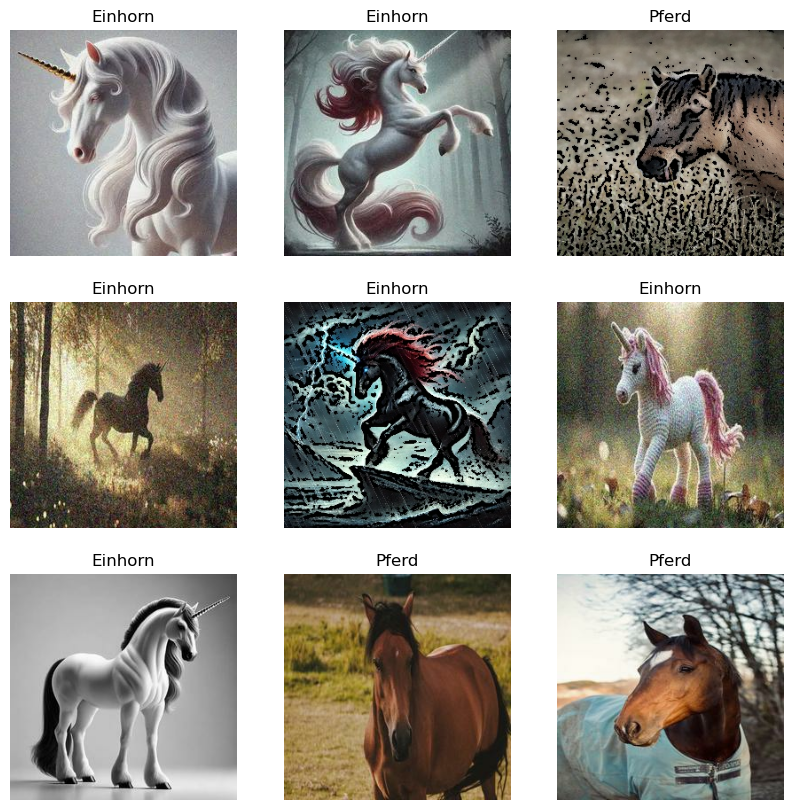

In [61]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [62]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [63]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [64]:
normalization_layer = layers.Rescaling(1./255)

In [68]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 272ms/step - accuracy: 0.7426 - loss: 0.6699 - val_accuracy: 0.9513 - val_loss: 0.1376
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 75s 250ms/step - accuracy: 0.9545 - loss: 0.1267 - val_accuracy: 0.9846 - val_loss: 0.0529
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 74s 248ms/step - accuracy: 0.9827 - loss: 0.0456 - val_accuracy: 0.9896 - val_loss: 0.0343
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 74s 248ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9942 - val_loss: 0.0227
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 74s 247ms/step - accuracy: 0.9914 - loss: 0.0298 - val_accuracy: 0.9892 - val_loss: 0.0305
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 76s 253ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9987 - val_loss: 0.0042
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 75s 252ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9937 - val_loss: 0.0201
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 75s 251ms/step - accuracy: 0.9985 - loss: 0

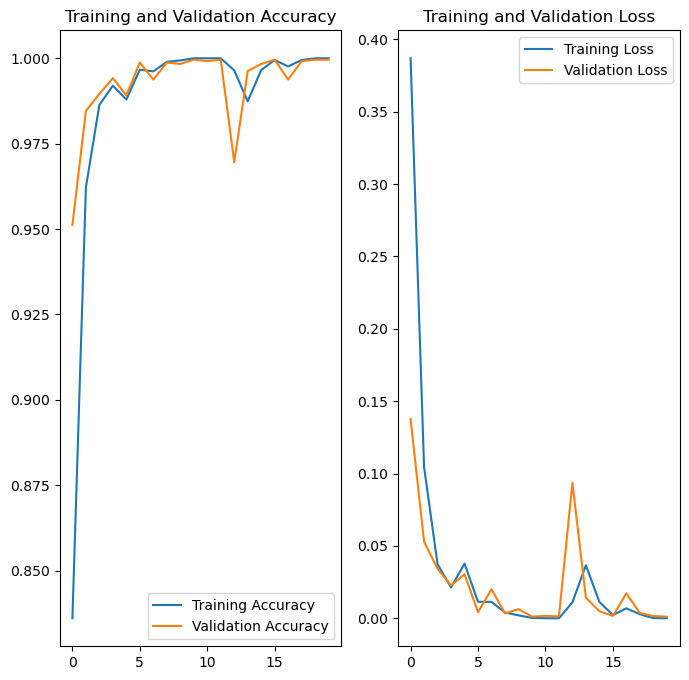

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image most likely belongs to Einhorn with a 99.98 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


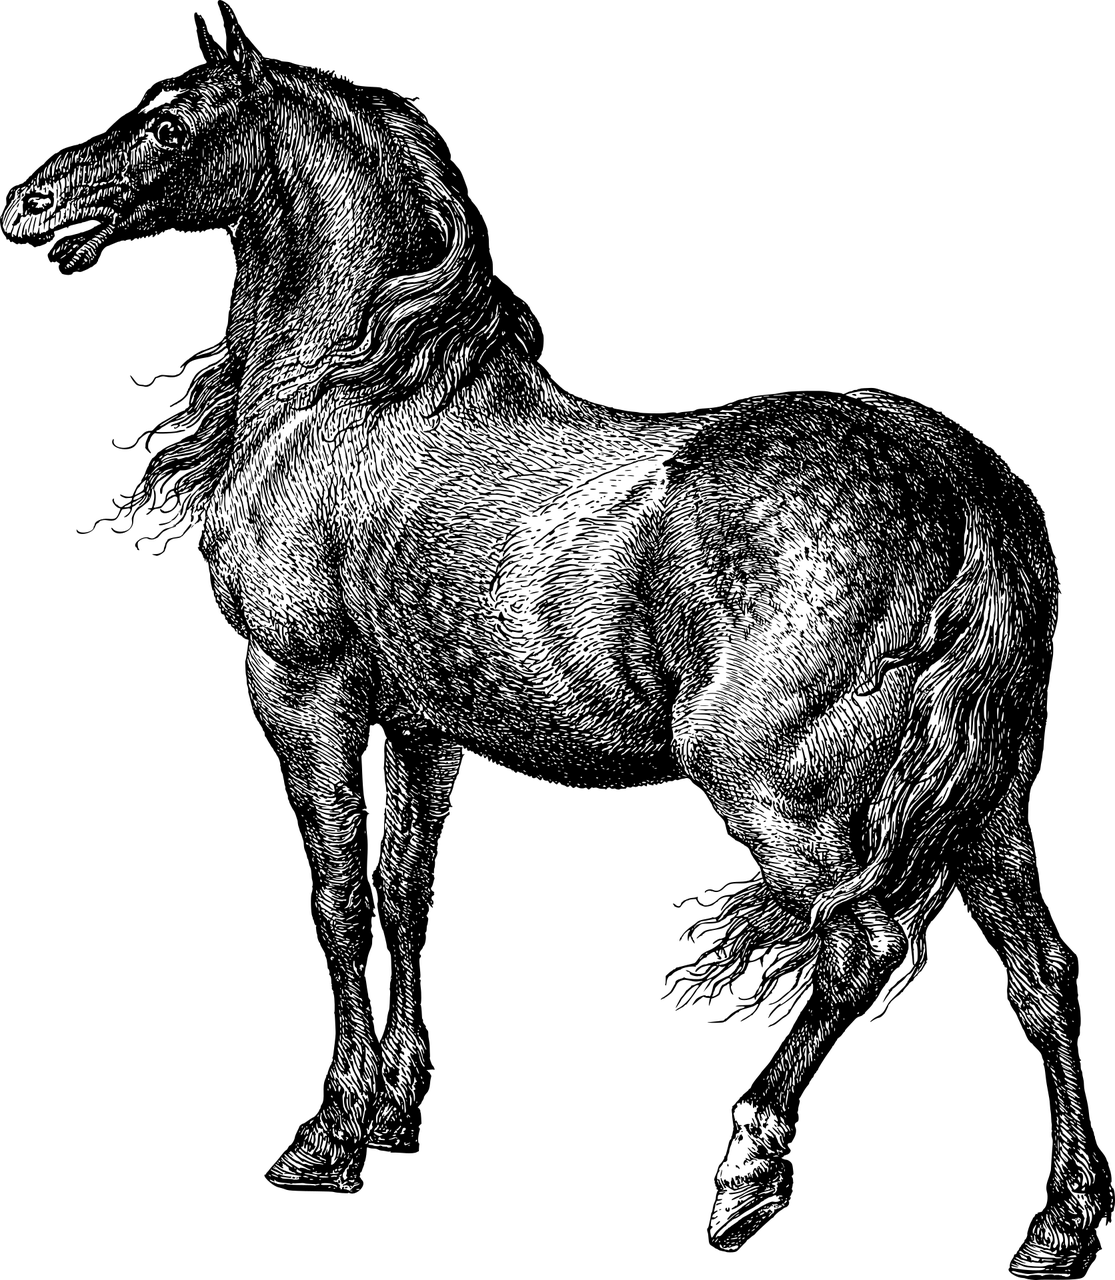

In [79]:

# Lokaler Pfad zum Bild
pferd = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
pferd_path = os.path.join(pferd, "horse-5553124_1280.jpg")  # Korrekte Verbindung

# Bild laden & vorbereiten
img = tf.keras.utils.load_img(pferd_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(pferd_path)

# Modell 3
### Bilderpfade und Anzahl Bilder je Klasse

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [2]:
data_path_einhoerner_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/5400_pferde_5400_einhoerner"
data_path_einhoerner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/5400_pferde_5400_einhoerner/Einhorn"
data_path_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/5400_pferde_5400_einhoerner/Pferd"
data_path_einhoerner_pferde_test_set = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/separates Test set"
data_path_einhoerner_test_set = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/separates Test set/Einhorn"
data_path_pferde_test_set = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Ultimativ diese Bilder nehmen FINAL/Einhörner und Pferde ohne webp Format/separates Test set/Pferd"

anzahl_einhoerner = len(os.listdir(data_path_einhoerner))
anzahl_pferde = len(os.listdir(data_path_pferde))
anzahl_einhoerner_test = len(os.listdir(data_path_einhoerner_test_set))
anzahl_pferde_test = len(os.listdir(data_path_pferde_test_set))

print(f"Anzahl der Einhorn-Bilder: {anzahl_einhoerner}")
print(f"Anzahl der Pferde-Bilder: {anzahl_pferde}")
print(f"Anzahl der Einhorn-Bilder im Test-Set: {anzahl_einhoerner_test}")
print(f"Anzahl der Pferde-Bilder im Test-Set: {anzahl_pferde_test}")

Anzahl der Einhorn-Bilder: 5401
Anzahl der Pferde-Bilder: 5401
Anzahl der Einhorn-Bilder im Test-Set: 600
Anzahl der Pferde-Bilder im Test-Set: 600


# Beispielbilder anzeigen

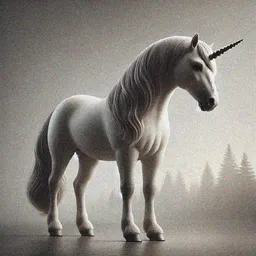

In [3]:
kompletter_pfad_einhorn_1 = os.path.join(data_path_einhoerner, os.listdir(data_path_einhoerner)[200])
kompletter_pfad_pferd_1 = os.path.join(data_path_pferde, os.listdir(data_path_pferde)[200])

PIL.Image.open(kompletter_pfad_einhorn_1)

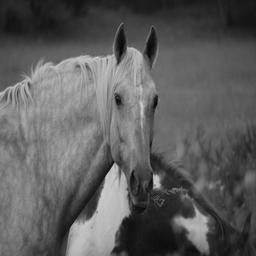

In [4]:
PIL.Image.open(kompletter_pfad_pferd_1)

# Komplettes Dataset laden (tf.data.Dataset-Objekt)

In [5]:
# Lade Trainings- und Validierungsset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path_einhoerner_pferde,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=None
)

Found 10800 files belonging to 2 classes.
Using 8640 files for training.


In [6]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path_einhoerner_pferde,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=None
)

Found 10800 files belonging to 2 classes.
Using 2160 files for validation.


In [7]:
# Lade Testset aus einem separaten Ordner
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path_einhoerner_pferde_test_set,
    image_size=(256, 256),
    batch_size=None
)

Found 1200 files belonging to 2 classes.


In [8]:
print(train_dataset.class_names)
print(val_dataset.class_names)
print(test_dataset.class_names)

['Einhorn', 'Pferd']
['Einhorn', 'Pferd']
['Einhorn', 'Pferd']


# Batch festlegen und Performance mit ATOTUNE steigern

In [9]:
# Definiere die Batch Size nachträglich
batch_size = 64  # Hier kannst du flexibel verschiedene Werte ausprobieren

# Füge das Batching hinzu
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Performance-Optimierung
AUTOTUNE = tf.data.AUTOTUNE

# Für das Trainingsset: Cache, Shuffle und Prefetch
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Für das Validierungs- und Testset: Cache und Prefetch (kein Shuffle nötig)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in val_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in test_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
    

(64, 256, 256, 3)
(64,)
(64, 256, 256, 3)
(64,)
(64, 256, 256, 3)
(64,)


2025-02-08 19:01:17.566954: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-08 19:01:17.599100: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


# Bilder anzeigen

2025-02-08 19:01:21.813066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


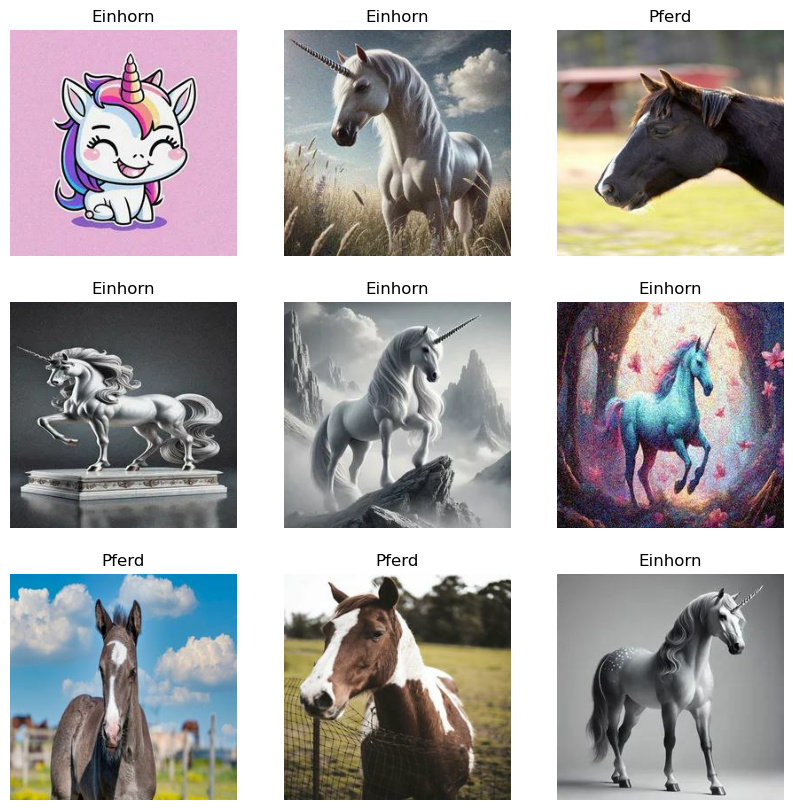

In [11]:
class_names = ['Einhorn', 'Pferd']

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Create the model
### mit from [0, 255] auf [0,1]

In [12]:
#num_classes = len(class_names)

model = Sequential([
  layers.Input(shape=(256, 256, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),  # Normalisierung der Aktivierungen nach der Convolution (eine Art Alternative zur Skalierung, da Scaler bei CNNs nichts taugen)
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.35),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation= 'sigmoid') # oder sigmoid ABER softmax für one-hot-encoding
])

# Compile the model

In [13]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer, #oder adam
              loss='binary_crossentropy', # categorical_crossentropy macht one-hot-encoding
              metrics=['accuracy'])

# Model summary

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,301,153 (16.41 MB)

 Trainable params: 4,300,673 (16.41 MB)

 Non-trainable params: 480 (1.88 KB)

# Train the model
### with early stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Definiere Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Überwache die Validierungsgenauigkeit
    patience=4,               # Warte 3 Epochen ohne Verbesserung, bevor gestoppt wird
    restore_best_weights=True # Lade die besten Gewichte, wenn das Training gestoppt wird
)




history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=50,
  callbacks=[early_stopping]  # Early Stopping Callback hinzufügen
)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 108s 799ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9958 - val_loss: 0.0075
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 108s 799ms/step - accuracy: 0.9999 - loss: 6.6550e-04 - val_accuracy: 0.9898 - val_loss: 0.0345
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 108s 801ms/step - accuracy: 0.9985 - loss: 0.0034 - val_accuracy: 0.9972 - val_loss: 0.0091
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 107s 795ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9981 - val_loss: 0.0032
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 107s 790ms/step - accuracy: 1.0000 - loss: 1.5673e-04 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 107s 791ms/step - accuracy: 1.0000 - loss: 1.4541e-04 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 107s 794ms/step - accuracy: 1.0000 - loss: 9.4629e-05 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 107s 791ms/step - ac

# Trainings- und Validierungsgenauigkeit

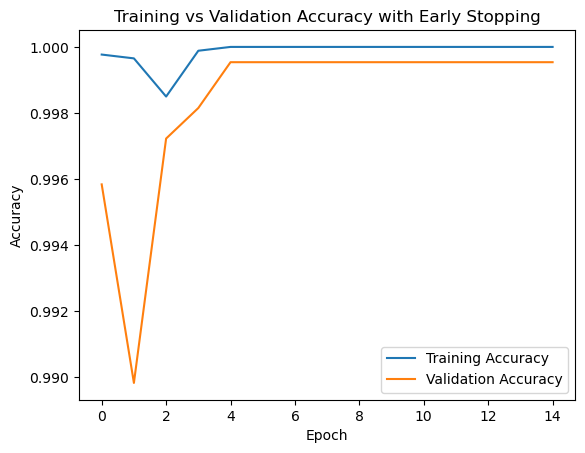

In [31]:
import matplotlib.pyplot as plt

# Trainings- und Validierungsgenauigkeit plotten
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy with Early Stopping')
plt.show()

# Modellbewertung mit dem Test-Set

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9846 - loss: 0.0482

Test Accuracy: 99.08%
Test Loss: 0.0286


# Training and Validation Accuracy / Loss

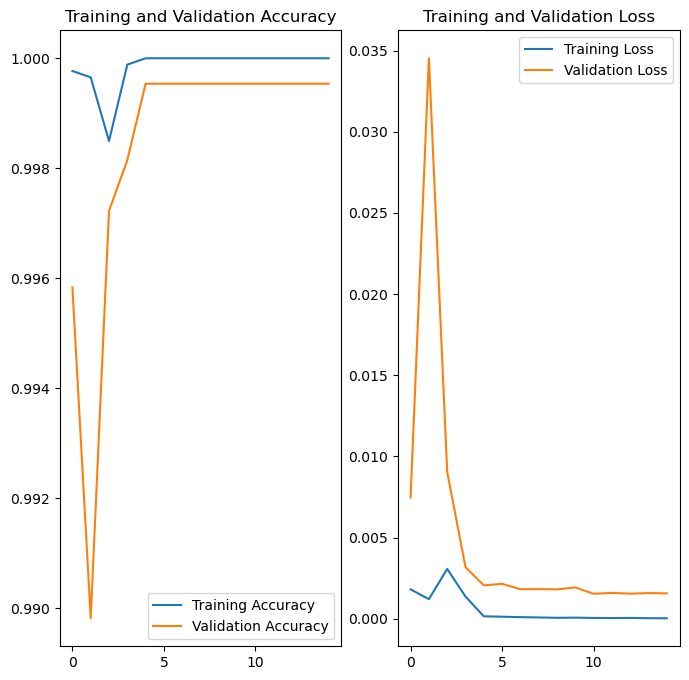

In [32]:
# Dynamische Ermittlung der Epochen
epochs = len(history.history['accuracy'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

# Plot für Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot für Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Confusion Matrix und Classification Report

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


2025-02-08 19:36:11.815264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


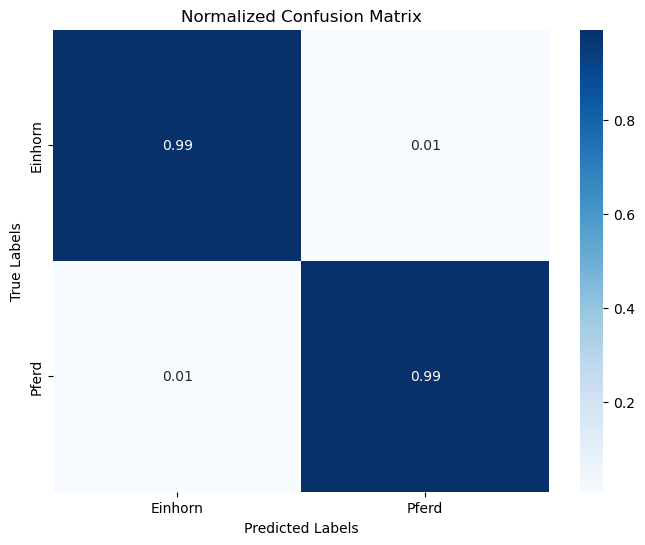

              precision    recall  f1-score   support

     Einhorn       0.99      0.99      0.99       600
       Pferd       0.99      0.99      0.99       600

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Leere Listen für die wahren Labels und die Vorhersagen
true_labels = []
predicted_labels = []

# Test-Set durchlaufen und Vorhersagen sammeln
for images, labels in test_dataset:
    # Vorhersagen vom Modell
    predictions = model.predict(images)
    
    # Da du sigmoid verwendest (binäre Klassifikation), runde die Vorhersagen auf 0 oder 1
    predicted_classes = (predictions > 0.5).astype(int).flatten()
    
    # Wahre Labels und Vorhersagen zur Liste hinzufügen
    true_labels.extend(labels.numpy())  # Wahre Labels als NumPy-Array
    predicted_labels.extend(predicted_classes)  # Vorhergesagte Labels

# 1. Confusion Matrix berechnen
cm = confusion_matrix(true_labels, predicted_labels)

# 2. Normalisierte Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 3. Visualisierung der normalisierten Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# 4. Classification Report erstellen
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

# Overall Accuracy, True Positive Rate (Recall), Precision  

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Overall Accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Recall (True Positive Rate)
recall = recall_score(true_labels, predicted_labels, average='macro')

# Precision
precision = precision_score(true_labels, predicted_labels, average='macro')

# Ergebnisse anzeigen
print(f'Overall Accuracy: {overall_accuracy * 100:.2f}%')
print(f'Recall (True Positive Rate): {recall * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')

Overall Accuracy: 99.08%
Recall (True Positive Rate): 99.08%
Precision: 99.08%


# Darstellung der Entscheidungsgrenze

In [26]:
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Sicherstellen, dass das Modell initialisiert ist
dummy_input = np.random.rand(1, 256, 256, 3)
model.predict(dummy_input)

# Feature-Extractor erstellen
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

# Features und Labels aus dem Test-Set extrahieren
features = []
labels = []

for images, label_batch in test_dataset:
    feature_batch = feature_extractor.predict(images)
    features.append(feature_batch)
    labels.append(label_batch.numpy())

# In NumPy-Arrays umwandeln
features = np.concatenate(features)
labels = np.concatenate(labels)

# t-SNE für 2D-Reduktion
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

# Visualisierung der Feature-Trennung
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[labels == 0, 0], features_2d[labels == 0, 1], label='Klasse 0', alpha=0.5)
plt.scatter(features_2d[labels == 1, 0], features_2d[labels == 1, 1], label='Klasse 1', alpha=0.5)
plt.title('t-SNE Visualisierung der Entscheidungsgrenze')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


ValueError: The layer sequential has never been called and thus has no defined input.

# Predict new data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This image most likely belongs to Einhorn with a 100.00 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


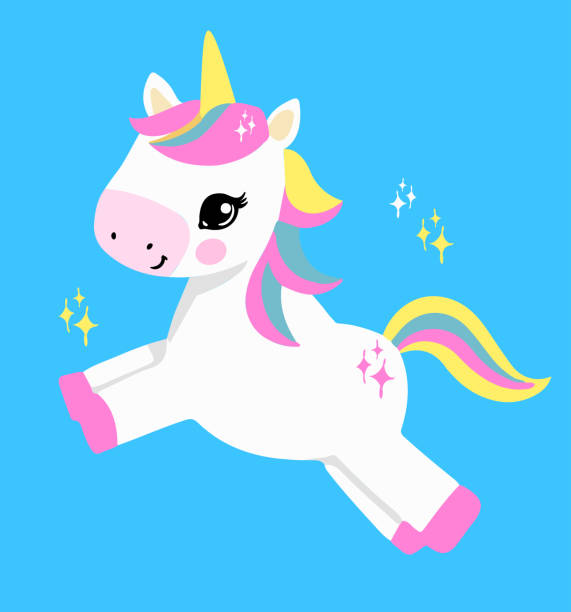

In [29]:

# Lokaler Pfad zum Bild
einhorn_ordner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
einhorn_path = os.path.join(einhorn_ordner, "istockphoto-2193425918-612x612.jpg")  # Korrekte Verbindung

# Bild laden & vorbereiten
img = tf.keras.utils.load_img(einhorn_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(einhorn_path)

In [130]:
# Definiere die Split-Größen
train_size = int(0.64 * dataset_size)
val_size = int(0.16 * dataset_size)
test_size = int(0.2 * dataset_size)

print(f"Trainingsdaten: {train_size}, Validierungsdaten: {val_size}, Testdaten: {test_size}")

Trainingsdaten: 7680, Validierungsdaten: 1920, Testdaten: 2400


In [132]:
# Aufteilen in Train, Validation, Test (ohne weiteres Shuffling)
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size)

# Anzahl der Elemente in jedem Dataset überprüfen
print(f"Trainingsset: {train_dataset.cardinality().numpy()} Bilder")
print(f"Validierungsset: {val_dataset.cardinality().numpy()} Bilder")
print(f"Testset: {test_dataset.cardinality().numpy()} Bilder")

Trainingsset: 7680 Bilder
Validierungsset: 1920 Bilder
Testset: 2400 Bilder


In [134]:
class_names = full_dataset.class_names
print(class_names)

['Einhorn', 'Pferd']


<_SkipDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


# Komplettes Dataset mit NumPy bearebiten und mittels Train Test Split mit Validation Set aufteilen

In [124]:
import numpy as np

# Features (Bilder) und Labels extrahieren
images = []
labels = []

for image, label in full_dataset:  # Hier ist image kein Batch, sondern ein einzelnes Bild
    images.append(image.numpy())   # Einzelbild hinzufügen
    labels.append(label.numpy())   # Einzelnes Label hinzufügen

# Bilder zusammenfügen (np.stack statt np.concatenate)
images = np.stack(images)  # Stapelt die Bilder entlang einer neuen Achse

# Labels zusammenfügen
labels = np.stack(labels)

print(images.shape)  # (Anzahl_Bilder, Höhe, Breite, Kanäle)
print(labels.shape)  # (Anzahl_Bilder,)

2025-02-08 14:59:38.700945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(12000, 256, 256, 3)
(12000,)


In [125]:
from sklearn.model_selection import train_test_split

# Zuerst in Trainings- und Testset splitten (z.B. 80% Train, 20% Test)
X_temp, X_test, y_temp, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels  # stratify sorgt dafür, dass alle Klassen gleichmäßig vertreten sind
)

# Dann das temporäre Trainingsset in Trainings- und Validierungsset splitten (z.B. 80% von 80% = 64% Training, 16% Validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Trainingsdaten: {X_train.shape}")
print(f"Validierungsdaten: {X_val.shape}")
print(f"Testdaten: {X_test.shape}")

Trainingsdaten: (7680, 256, 256, 3)
Validierungsdaten: (1920, 256, 256, 3)
Testdaten: (2400, 256, 256, 3)


# NumPy-Arrays zurück in tf.data.Dataset-Objekt

In [126]:
# Umwandeln in TensorFlow Datasets ohne Batching
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [127]:
class_names = train_dataset.class_names
print(class_names)

AttributeError: '_TensorSliceDataset' object has no attribute 'class_names'